# Training Data
In this notebook, we train our neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

For binary classification we used Logistic Regression which resulted in 0 or 1 for each input. For multi-class classification we use more general case of logistic regression which is softmax regression.
In logistic regression we had:

$
Z = W\times{X} + B\\
A = sigmoid(Z)
$

and the loss function was BinaryCrossEntropy:

$
Loss(a_1, y^{(i)}) = -ylog(a_1)-(1-y)log(1-a_1)
$ <br>
as we know $a_0 = 1-a_1$<br>
$
Loss(a_1, y^{(i)}) = -ylog(a_1)-(1-y)log(a_0)
$

## Softmax
For softmax regression we define its function as below
### Function

$
\begin{equation}
    Z = W\times{X} + B\\
    A^{[j]} = \frac{\displaystyle{e^{Z_{j}}}}{\displaystyle\sum_{i=1}^{n}e^{Z_{i}}}
\end{equation}
$

- Above formula shows Softmax equation for $j$th unit and $n$ is the number of classes.
- In both equations, $X$ is a matrix that its rows identify data and columns identify features.
- In both equations, $W$ is a matrix that its rows identify features and columns identify units.
- In both equations, $B$ is a matrix with one row and the number of units, columns identifying intercept for each unit.
- In both equations, $Z$ is a matrix resulted from $W\times{X}+B$ comprising $m$ rows and $n$ columns. $m$ is the number of data and $n$ is the number of units in that specific layer.
- In the last equation, $Z_j$ means $j$th column of $Z$.

### Loss

Loss function is like BinaryCrossEntropy but more general one. Loss function for softmax is called CategoricalCrossEntropy which returns one-hot encoded result. Also SparseCategoricalCrossEntropy is one of the losses for softmax which returns an index specifiying the class.

$
\begin{equation}
    Loss(\overrightarrow{a}, y)=
    \begin{cases}
        -log(a_0) & if y = 0\\
        -log(a_1) & if y = 1\\
        \vdots\\
        -log(a_{n-1}) & if y = n-1\\
    \end{cases}
\end{equation}
$

### Cost
Cost is the average of all of the Loss functions.

$
cost(\overrightarrow{a}, \overrightarrow{y}) = \frac{1}{n}\displaystyle \sum_{i=0}^{n - 1} Loss(a_{i}, y_{i})
$

In [2]:
def softmax(z):
    z_exp = np.exp(z)
    result = z_exp / np.sum(z_exp)
    return result

In [3]:
def loss(a, y):
    return -np.log(a)[y]

In [4]:
def cost(a, y):
    summation = 0
    for i in range(len(a)):
        summation += loss(a[i], y[i])
    return summation / len(a)

## Example
Train handwritten digits

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
imsize = X_train.shape[1]

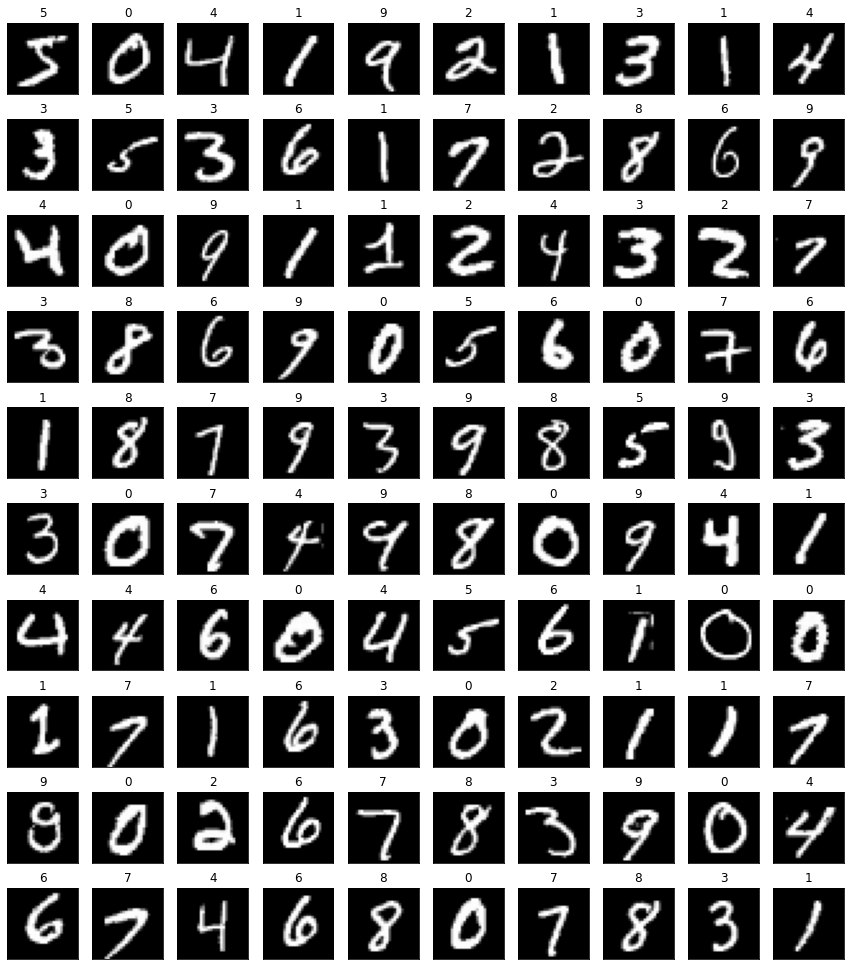

In [6]:
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
cnt=0
for i in ax.flatten():
    i.imshow(X_train[cnt], cmap='gray')
    i.set_title(y_train[cnt])
    i.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    cnt += 1
fig.subplots_adjust(top=1)

In [7]:
X_train = X_train.reshape(X_train.shape[0], imsize ** 2) # Flattening each image
X_test = X_test.reshape(X_test.shape[0], imsize ** 2) # Flattening each image

In [8]:
model = Sequential([
    tf.keras.Input(shape=(imsize ** 2, )),
    Dense(units=25, activation='relu', name='layer1'),
    Dense(units=15, activation='relu', name='layer2'),
    Dense(units=10, activation='softmax', name='layer3')
], name='softmax_model')
model.summary()

Model: "softmax_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                19625     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
norm = Normalization()
norm.adapt(X_train)
Xn_train = norm(X_train)
model.fit(Xn_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 775us/step - loss: 0.3475 - accuracy: 0.9007
Epoch 2/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.1928 - accuracy: 0.9455
Epoch 3/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.1628 - accuracy: 0.9538
Epoch 4/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.1487 - accuracy: 0.9577
Epoch 5/10
1875/1875 [==============================] - 1s 787us/step - loss: 0.1359 - accuracy: 0.9607
Epoch 6/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.1289 - accuracy: 0.9637
Epoch 7/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.1200 - accuracy: 0.9662
Epoch 8/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.1146 - accuracy: 0.9679
Epoch 9/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.1080 - accuracy: 0.9697
Epoch 10/10
1875/1875 [==============================] - 1s 782u

In [10]:
predicted = model(norm(X_test)).numpy().argmax(axis=1)

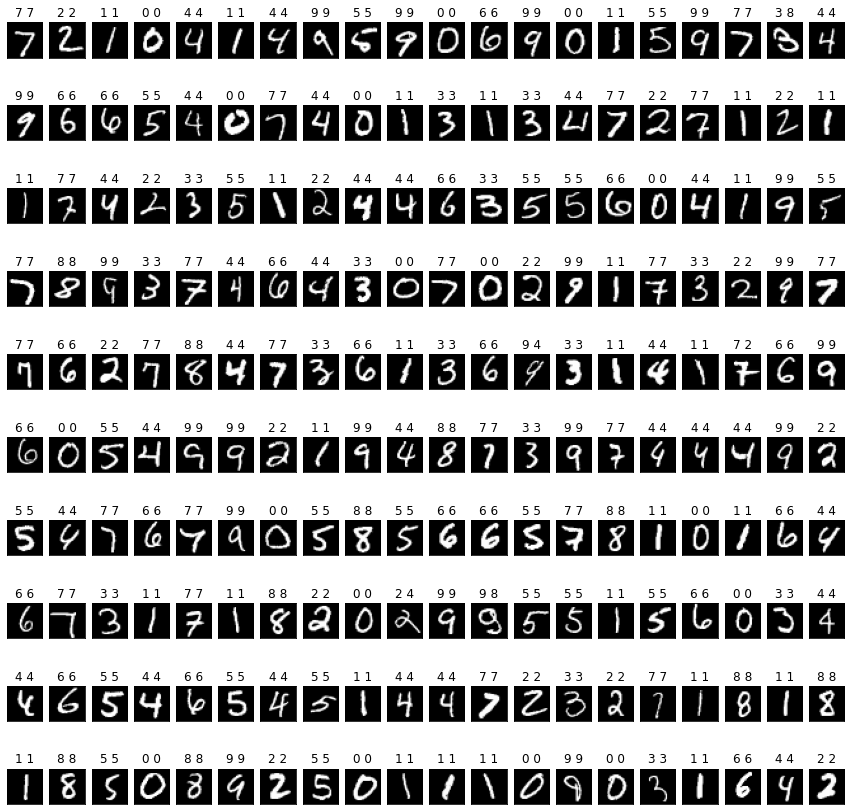

In [11]:
fig, ax = plt.subplots(10, 20, figsize=(15, 15))
cnt=0
for i in ax.flatten():
    i.imshow(X_test[cnt].reshape(-1, imsize), cmap='gray')
    i.set_title(f"{y_test[cnt]} {predicted[cnt]}")
    i.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    cnt += 1

First number above each image is the original number and the second one is the predicted number.

### Better approach

In [12]:
model_accurate = Sequential([
    tf.keras.Input(shape=(imsize ** 2)),
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear')
], name='accurate_softmax')
model_accurate.summary()

Model: "accurate_softmax"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_accurate.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model_accurate.fit(Xn_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 786us/step - loss: 0.3345 - accuracy: 0.9043
Epoch 2/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.1974 - accuracy: 0.9454
Epoch 3/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.1718 - accuracy: 0.9536
Epoch 4/10
1875/1875 [==============================] - 1s 782us/step - loss: 0.1553 - accuracy: 0.9583
Epoch 5/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.1413 - accuracy: 0.9630
Epoch 6/10
1875/1875 [==============================] - 1s 786us/step - loss: 0.1288 - accuracy: 0.9656
Epoch 7/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.1223 - accuracy: 0.9673
Epoch 8/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.1163 - accuracy: 0.9691
Epoch 9/10
1875/1875 [==============================] - 1s 782us/step - loss: 0.1099 - accuracy: 0.9704
Epoch 10/10
1875/1875 [==============================] - 1s 783u

In [14]:
logits = model_accurate(Xn_train)
f_x = tf.nn.softmax(logits)

In [18]:
predicted_logits = model_accurate(norm(X_test))
predicted_fx = tf.nn.softmax(predicted_logits).numpy().argmax(axis=1)

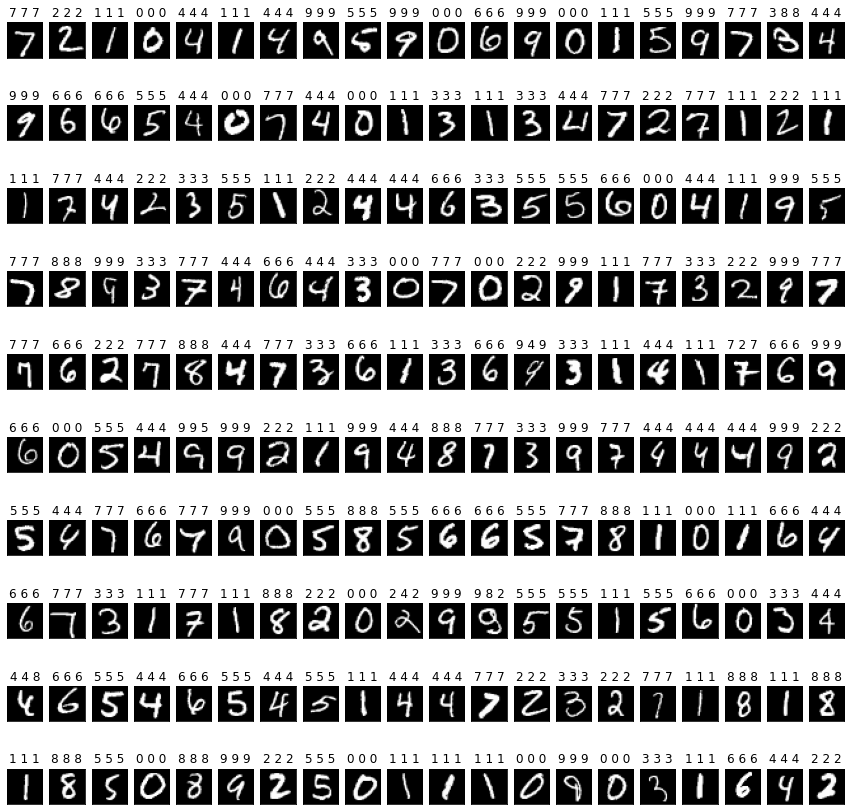

In [19]:
fig, ax = plt.subplots(10, 20, figsize=(15, 15))
cnt=0
for i in ax.flatten():
    i.imshow(X_test[cnt].reshape(-1, imsize), cmap='gray')
    i.set_title(f"{y_test[cnt]} {predicted[cnt]} {predicted_fx[cnt]}")
    i.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    cnt += 1

 - First number is the original number, second number is from the first prediction and third number is from the last prediction.<br>
 Second model, eventhough the roughly the same, but is more accurate and is recommended approach.

End.